### AIML: Logistic Regression: sklearn (10th March 2022, Thursday)


In [163]:
# load digits dataset
from sklearn.datasets import load_digits


Import the dataSet


In [164]:
digits = load_digits()
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [165]:
import matplotlib.pyplot as plt

# Show 2D data, each row contains columns with meaning
digits.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [166]:
# Dimentions of Actual data
digits.data.shape


(1797, 64)

In [167]:
d = digits.data[0:500]
d.shape  # <- The 64 represents the number of pixels


(500, 64)

In [168]:
# Target of lobel dimentions
digits.target.shape


(1797,)

In [169]:
# image is represented
image = digits.data[300]
print(image)


[ 0.  0.  1. 11. 16. 16. 10.  0.  0.  0. 13. 14.  8. 12. 11.  0.  0.  0.
  4.  0.  0. 13.  4.  0.  0.  0.  0.  0.  3. 15.  0.  0.  0.  0.  2. 15.
 16. 16.  9.  0.  0.  0.  3. 13. 16.  8.  1.  0.  0.  0.  0.  7. 10.  0.
  0.  0.  0.  0.  0. 13.  3.  0.  0.  0.]


In [170]:
digits.target[400]


4

In [171]:
import numpy as np

np.reshape(image, (8, 8))


array([[ 0.,  0.,  1., 11., 16., 16., 10.,  0.],
       [ 0.,  0., 13., 14.,  8., 12., 11.,  0.],
       [ 0.,  0.,  4.,  0.,  0., 13.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 15.,  0.,  0.],
       [ 0.,  0.,  2., 15., 16., 16.,  9.,  0.],
       [ 0.,  0.,  3., 13., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.]])

### Plotting intensity graph

For Plotting as per intensity we use `ply.imshow()` function.  
The color intensity changes with Pressure


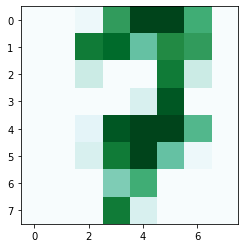

In [172]:
plt.imshow(np.reshape(image, (8, 8)), cmap="BuGn")  # <- cmap = colormap


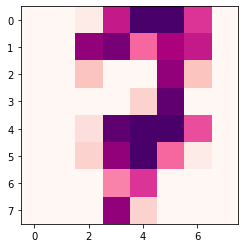

In [173]:
plt.imshow(np.reshape(image, (8, 8)), cmap="RdPu")  # <- cmap = colormap


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2 # <- 20 % data for testing | 80% for training
)


Creating the Model

In [175]:
logReg1 = LogisticRegression(max_iter=10_000)
logReg1.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

Now, testing the Prediction of the dataSet

In [176]:
# list storing the predicted results
y_pred = logReg1.predict(x_test)
y_pred

array([0, 9, 4, 1, 8, 7, 4, 0, 7, 2, 4, 4, 9, 9, 2, 0, 0, 4, 9, 9, 4, 1,
       6, 2, 2, 5, 3, 8, 4, 9, 9, 2, 6, 9, 8, 0, 9, 8, 1, 0, 9, 3, 3, 8,
       0, 4, 5, 5, 1, 8, 7, 4, 4, 6, 3, 7, 4, 4, 1, 9, 3, 7, 4, 4, 6, 6,
       0, 5, 4, 9, 4, 2, 1, 5, 8, 7, 7, 3, 1, 2, 0, 4, 2, 3, 6, 8, 2, 6,
       4, 5, 8, 1, 9, 1, 4, 3, 7, 2, 8, 3, 3, 1, 6, 4, 7, 8, 5, 8, 1, 4,
       0, 1, 0, 2, 7, 4, 3, 3, 0, 7, 1, 8, 5, 1, 1, 2, 3, 1, 5, 9, 6, 9,
       1, 5, 3, 6, 9, 6, 6, 2, 1, 8, 0, 2, 6, 6, 5, 8, 5, 8, 8, 6, 7, 5,
       1, 0, 0, 1, 4, 5, 2, 2, 1, 9, 7, 0, 1, 6, 9, 1, 1, 3, 8, 0, 1, 7,
       7, 3, 3, 5, 0, 6, 0, 4, 7, 6, 5, 1, 6, 7, 6, 9, 0, 4, 7, 7, 0, 3,
       8, 1, 3, 8, 7, 9, 3, 2, 2, 3, 8, 7, 2, 4, 4, 9, 8, 7, 2, 0, 2, 4,
       0, 8, 8, 2, 2, 4, 6, 0, 4, 9, 6, 5, 5, 3, 0, 2, 5, 5, 8, 9, 3, 3,
       0, 4, 8, 6, 9, 8, 7, 5, 8, 0, 7, 8, 3, 7, 1, 5, 6, 3, 4, 4, 5, 5,
       5, 0, 9, 2, 2, 5, 4, 4, 5, 8, 4, 7, 0, 8, 6, 3, 4, 6, 9, 4, 0, 0,
       3, 0, 3, 0, 6, 2, 0, 9, 2, 5, 2, 4, 0, 2, 7,

Check Accuracy

In [177]:
f"{logReg1.score(x_test, y_test):.2%} Accuracy"

'96.67% Accuracy'